# El Niño vs La Niña

 Highlights:
 
- 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import os.path as op
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import df2img


sys.path.append("../../../../indicators_setup")
from ind_setup.colors import get_df_col, plotting_style
from ind_setup.tables import plot_df_table
from ind_setup.plotting_int import plot_oni_index_th
from ind_setup.plotting import plot_bar_probs_ONI, add_oni_cat

plotting_style()
from ind_setup.core import fontsize

sys.path.append("../../../functions")
from data_downloaders import GHCN, download_oni_index

## Define location and variables of interest

In [2]:
country = 'Palau'
vars_interest = ['PRCP']

## Get Data

https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/doc/GHCND_documentation.pdf

In [3]:
update_data = False
path_data = "../../../data"

In [4]:
if update_data:
    df_country = GHCN.get_country_code(country)
    print(f'The GHCN code for {country} is {df_country["Code"].values[0]}')

    df_stations = GHCN.download_stations_info()
    df_country_stations = df_stations[df_stations['ID'].str.startswith(df_country.Code.values[0])]
    print(f'There are {df_country_stations.shape[0]} stations in {country}')

## Using Koror Station

In [5]:
if update_data:
    GHCND_dir = 'https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/'
    id = 'PSW00040309' # Koror Station
    dict_prcp = GHCN.extract_dict_data_var(GHCND_dir, 'PRCP', df_country_stations.loc[df_country_stations['ID'] == id])[0]
    data = dict_prcp[0]['data']#.dropna()
    data.to_pickle(op.join(path_data, 'GHCN_precipitation.pkl'))
else:
    data = pd.read_pickle(op.join(path_data, 'GHCN_precipitation.pkl'))

st_data = data

## ONI index

https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php

In [6]:
p_data = 'https://psl.noaa.gov/data/correlation/oni.data'

In [7]:
if update_data:
    df1 = download_oni_index(p_data)
    df1.to_pickle(op.join(path_data, 'oni_index.pkl'))
else:
    df1 = pd.read_pickle(op.join(path_data, 'oni_index.pkl'))

In [8]:
lims = [-.5, .5]
plot_oni_index_th(df1, lims = lims)

In [9]:
st_data_monthly = st_data.resample('M').mean()
st_data_monthly.index = pd.DatetimeIndex(st_data_monthly.index).to_period('M').to_timestamp() + pd.offsets.MonthBegin(1)

In [10]:
df1['prcp'] = st_data_monthly['PRCP']#.rolling(window=rolling_mean).mean()

In [11]:
df1 = add_oni_cat(df1, lims = lims)

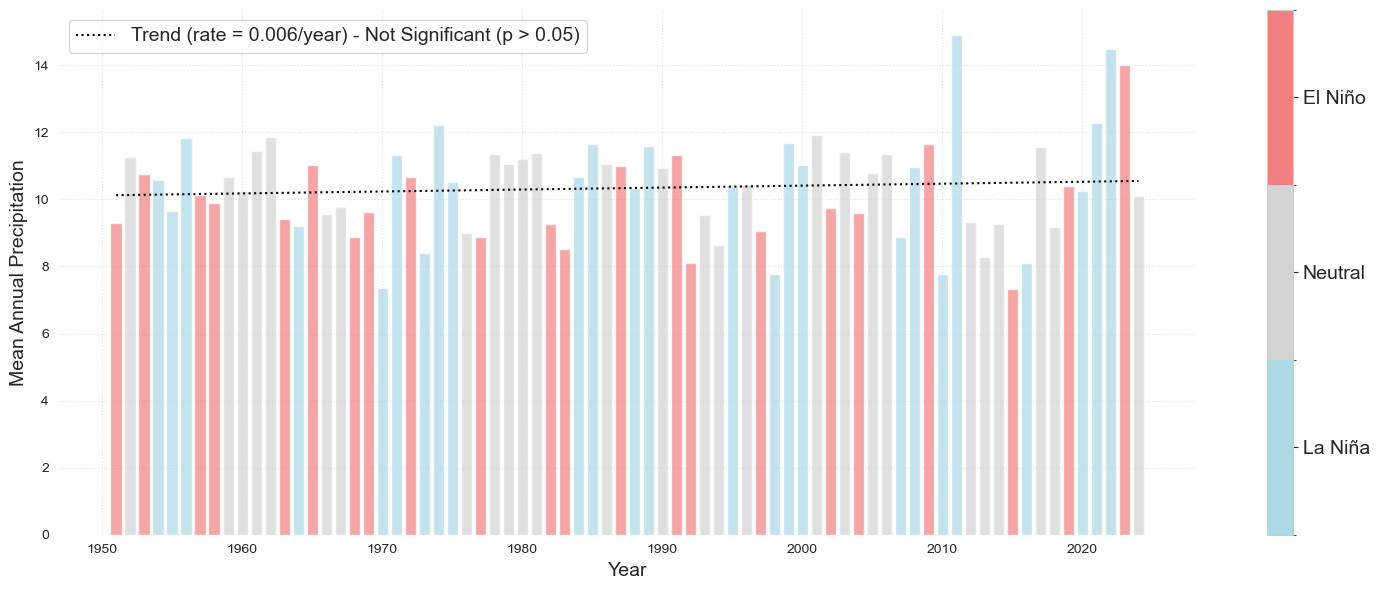

In [12]:
df2 = df1.resample('Y').mean()
fig= plot_bar_probs_ONI(df2, var='prcp', y_label = 'Mean Annual Precipitation')

Text(0.5, 1.05, 'Mean Annual Precipitation Anomaly over the 1961-1990 mean')

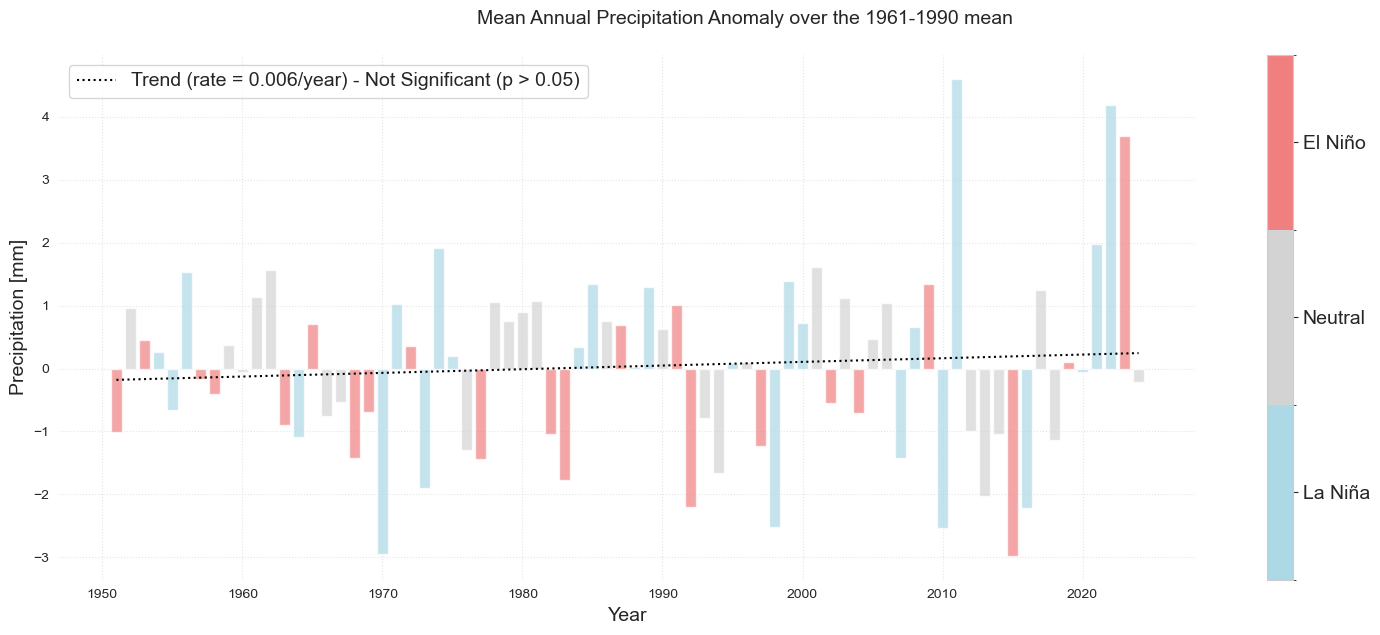

In [13]:
df2['prcp_ref'] = df2.prcp - df2.loc['1961':'1990'].prcp.mean()
fig = plot_bar_probs_ONI(df2, var='prcp_ref', y_label = 'Precipitation [mm]')
fig.suptitle('Mean Annual Precipitation Anomaly over the 1961-1990 mean', fontsize = fontsize, y = 1.05)


In [14]:
df_format = np.round(df1.describe(), 2)

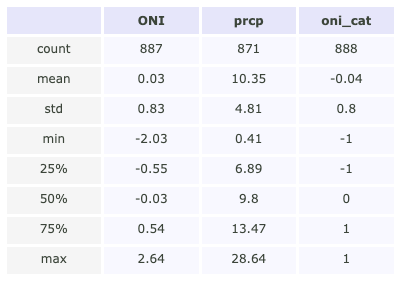

In [15]:
fig = plot_df_table(df_format, figsize = (400, 300))
df2img.save_dataframe(fig=fig, filename="getting_started.png")